# Indian Liver Patient Analysis using Logistic Regression with converting variables
#By- Aarush Kumar
#Dated: September 16,2021

### About

Liver disease is a growing problem of our time, and having a good method to identify the patients most at risk could help doctors make a faster diagnosis and treatment. We must remember that statistical methods are intended to HELP diagnosticians, not replace them as unquestionable oracles.
* Note: During the analysis, certain variables may be removed for the sake of the model. I will use the knowledge acquired from the books with Logistic Regression as the default classification method in my mind.

Major variables:
* Bilirubin is a bile pigment that comes from the breakdown of red blood cells. An increase in this concentration may cause jaundice.
* Alkaline is en enzyme which can by found in the liver and when liver is damaged Alkaline may leak into the bloodstream. Its high levels in blood can indicate liver disease.
* Alamine Aminotransferase: test result can range from 7 to 55 units per liter.
* Aspartate_Aminotransferase: normal ranges are: 10-40 units/L (males), 9-32 units/L (females).
* In people with badly damaged livers, proteins are not properly processed.
* Low albumin levels can indicate a problem with liver or kidneys.
* Globulins play an important role in liver function, blood clotting, and fighting infection. Low globulin levels can be a sign of liver or kidney disease. High levels may indicate infection, inflammatory disease or immune disorders.

In [1]:
!pip install factor_analyzer

     |████████████████████████████████| 40kB 5.6MB/s eta 0:00:011
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=ad13eefb2543ebbab5892e04fdce9900ac54e60aac9207285c1fffa5a2266df1
  Stored in directory: /home/aarush100616/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


## Factor Analysis in Machine Learning :
1. Reduce a large numbers of variables into fewer numbers of factors.
2. Puts maximum common variance into a common score.
3. Associates multiple observed variables with a latent variable.
4. Has the same numbers of factors and variables,where each factor contains a certain amount of overall variance .

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 
import numpy as np
from scipy.stats import kurtosis, skew, shapiro, zscore
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score, roc_curve, roc_auc_score

In [3]:
df = pd.read_csv("/home/aarush100616/Downloads/Projects/Indian Liver Patient Logistic Regression/indian_liver_patient.csv")

In [4]:
df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[583 rows x 11 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
df.shape

(583, 11)

In [8]:
df.size

6413

In [9]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [10]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [11]:
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

In [12]:
df[df.isna().any(axis=1)]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        2  
312      4.8                         NaN        2

In [13]:
df = df.dropna()

In [14]:
df_c = df.copy()

In [15]:
df_c["Dataset"] = df["Dataset"].map({1:"Sick", 2:"Healthy"})

In [16]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Dataset'] = df['Dataset'].map({1: 1, 2: 0})
df.rename(columns={'Gender': 'Male'}, inplace=True)
df.rename(columns={'Dataset': 'Target'}, inplace=True)

/home/aarush100616/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/aarush100616/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/aarush100616/.local/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

## Dividing dataset into categorical and quantitative variables

In [17]:
df_c.drop(columns=['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
                   'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                   'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
                   'Albumin_and_Globulin_Ratio'], inplace=True)

In [18]:
df_quantitative = df.drop(columns=["Male", "Target"])

## Operation on categorical variables

In [19]:
df_c.Gender.value_counts(normalize=True)

Male      0.758204
Female    0.241796
Name: Gender, dtype: float64

In [20]:
df_c.Dataset.value_counts(normalize=True)

Sick       0.715026
Healthy    0.284974
Name: Dataset, dtype: float64

In [21]:
df_c.groupby("Dataset").Gender.value_counts()

Dataset  Gender
Healthy  Male      116
         Female     49
Sick     Male      323
         Female     91
Name: Gender, dtype: int64

In [22]:
pd.crosstab(df_c['Gender'], df_c['Dataset']).apply(lambda r: r/r.sum()*100, axis=1)

Dataset   Healthy      Sick
Gender                     
Female   35.00000  65.00000
Male     26.42369  73.57631

Text(0.5, 1.0, 'Liver dieses among Gender')

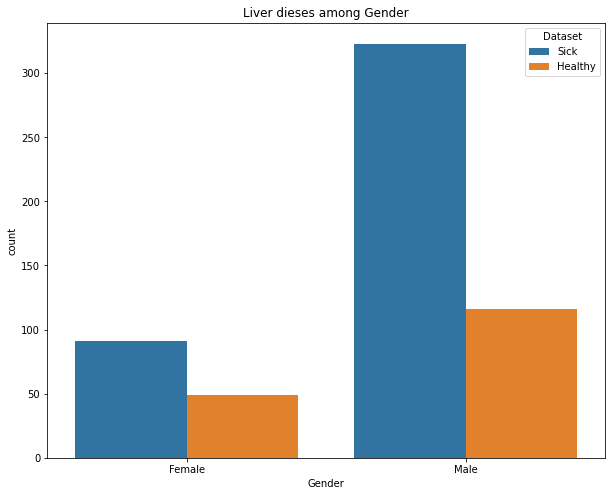

In [23]:
plt.rcParams['figure.figsize'] = [10, 8]  # for size
sns.countplot(x="Gender", hue="Dataset", data=df_c).set_title("Liver dieses among Gender")

## Operation on quantitative variables

In [24]:
df_quantitative.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  579.000000       579.000000        579.000000            579.000000   
mean    44.782383         3.315371          1.494128            291.366149   
std     16.221786         6.227716          2.816499            243.561863   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                579.000000                  579.000000      579.000000   
mean                  81.126079                  110.414508        6.481693   
std                  183.182845                  289.850034        1.084641   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   61.000000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio  
count  579.000000                  579.000000  
mean     3.138515                    0.947064  
std      0.794435                    0.319592  
min      0.900000                    0.300000  
25%      2.600000                    0.700000  
50%      3.100000                    0.930000  
75%      3.800000                    1.100000  
max      5.500000                    2.800000

In [25]:
# coefficient of variation
def cv(x): return np.std(x) / np.mean(x) * 100
df_quantitative.apply(cv)

Age                            36.192293
Total_Bilirubin               187.681424
Direct_Bilirubin              188.341676
Alkaline_Phosphotase           83.520836
Alamine_Aminotransferase      225.605118
Aspartate_Aminotransferase    262.284033
Total_Protiens                 16.719460
Albumin                        25.290574
Albumin_and_Globulin_Ratio     33.716416
dtype: float64

In [26]:
# kurtosis
df_quantitative.apply(kurtosis, bias=False)

Age                            -0.564927
Total_Bilirubin                36.921240
Direct_Bilirubin               11.252207
Alkaline_Phosphotase           17.634683
Alamine_Aminotransferase       50.234929
Aspartate_Aminotransferase    149.939407
Total_Protiens                  0.239473
Albumin                        -0.390890
Albumin_and_Globulin_Ratio      3.281900
dtype: float64

Kurtosis is a measure of outliers. The higher its value, the more likely there are outliers in the database. The lower the value, the more the results are clustered around the mean.

In [27]:
# skewness
df_quantitative.apply(skew, bias=False)

Age                           -0.033591
Total_Bilirubin                4.890768
Direct_Bilirubin               3.199163
Alkaline_Phosphotase           3.753502
Alamine_Aminotransferase       6.527575
Aspartate_Aminotransferase    10.512251
Total_Protiens                -0.292433
Albumin                       -0.048516
Albumin_and_Globulin_Ratio     0.992299
dtype: float64

The skewness for most variables is positive, indicating that the distribution has an extended right arm.

In [28]:
for i in df_quantitative:
    print([i])
    a, b = shapiro(df_quantitative[[i]])
    if b < 0.05:
        print("H1")
    else:
        print("H0")

['Age']
H1
['Total_Bilirubin']
H1
['Direct_Bilirubin']
H1
['Alkaline_Phosphotase']
H1
['Alamine_Aminotransferase']
H1
['Aspartate_Aminotransferase']
H1
['Total_Protiens']
H1
['Albumin']
H1
['Albumin_and_Globulin_Ratio']
H1


### alpha = 0.05
### H0 = The sample comes from a normal distribution.
### H1 = The sample is not coming from a normal distribution.

## Outleiers

Text(0.5, 1.0, 'Plot showing outliers')

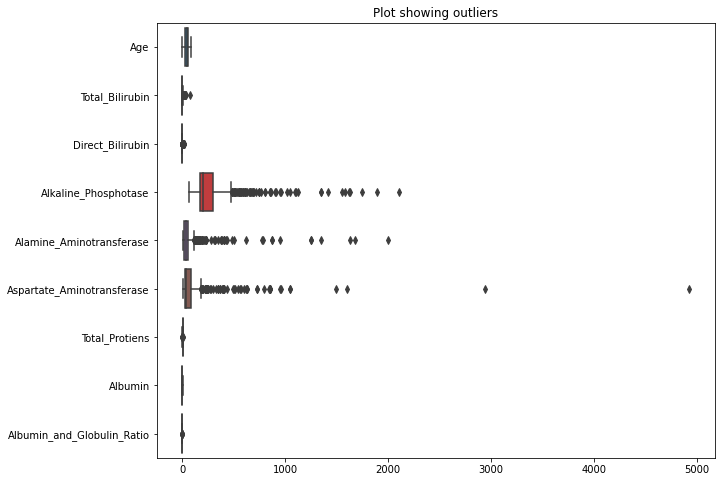

In [29]:
sns.boxplot(data=df_quantitative, orient="h").set_title("Plot showing outliers")

To find outliers we will use the interquartile range IQR=Q3−Q1. The outlier observations are below the lower bound defined as lb=Q1−1.5∗IQR and above the upper bound defined as ub=Q3+1.5∗IQR.

In [30]:
def remove_outliers(df_in):
    Q1 = df_in.quantile(0.25)
    Q3 = df_in.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    df_clean = df_in[~((df_in < lower_limit) | (df_in > upper_limit)).any(axis=1)]
    return df_clean

In [31]:
df_clean = remove_outliers(df_quantitative)

Text(0.5, 1.0, 'Plot showing outliers after the 1st removal of outliers')

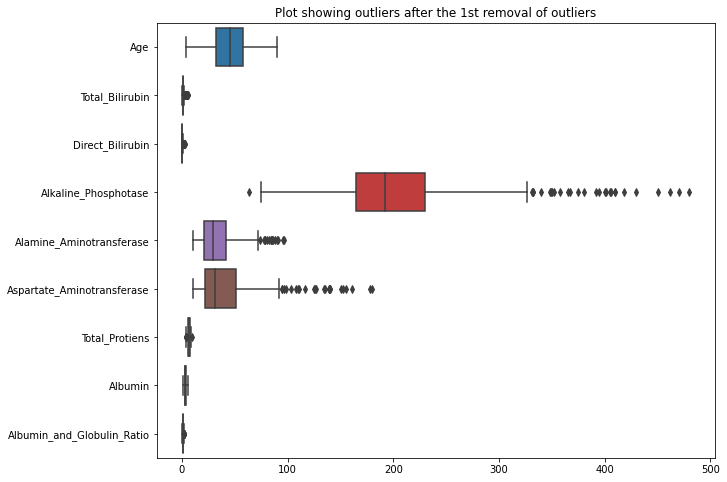

In [32]:
sns.boxplot(data=df_clean, orient="h").set_title(
    "Plot showing outliers after the 1st removal of outliers")

In [33]:
for i in range(5):
    df_clean = remove_outliers(df_clean)

Text(0.5, 1.0, 'Plot showing outliers after the 6th removal of outliers')

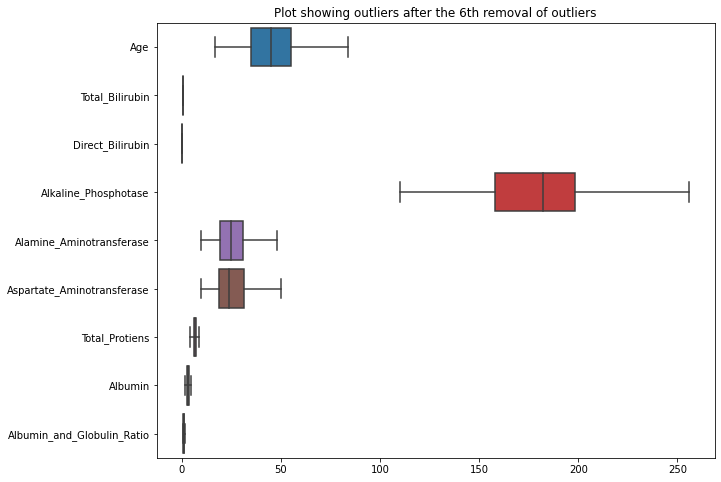

In [34]:
sns.boxplot(data=df_clean, orient="h").set_title(
    "Plot showing outliers after the 6th removal of outliers")

In [35]:
print("Number of cases in df:", len(df))
print("Number of cases in df_clean:", len(df_clean))
print("We've removed:", round(100-(len(df_clean)*100/len(df)),2), "percent of rows.")

Number of cases in df: 579
Number of cases in df_clean: 119
We've removed: 79.45 percent of rows.


In [36]:
df_c_trimmed = df_c[df_c.index.isin(df_clean.index)]

In [37]:
df_c_trimmed.Dataset.value_counts()

Sick       61
Healthy    58
Name: Dataset, dtype: int64

In [38]:
df_c_trimmed.Gender.value_counts()

Male      73
Female    46
Name: Gender, dtype: int64

In [39]:
df_trimmed = df[df.index.isin(df_clean.index)]

Text(0.5, 1.0, 'Before removing outliers')

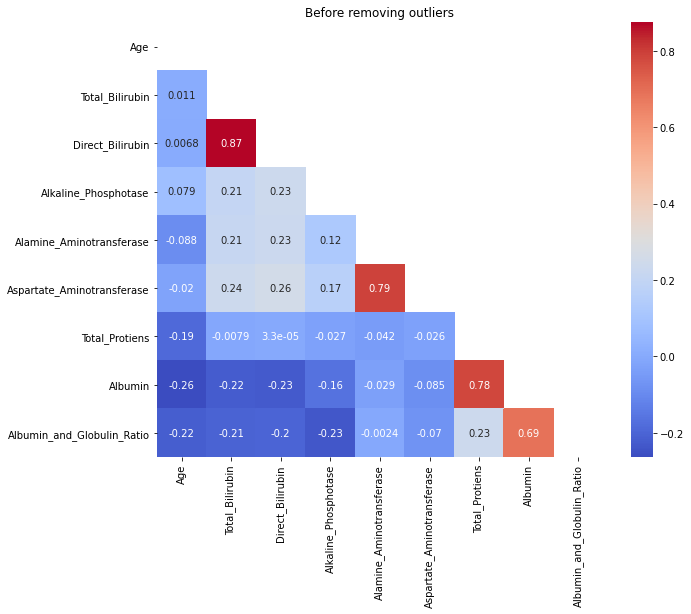

In [40]:
sns.heatmap(df_quantitative.corr(), annot=True, cmap='coolwarm',
            mask=np.triu(df_quantitative.corr())).set_title("Before removing outliers")

Text(0.5, 1.0, 'After removing outliers')

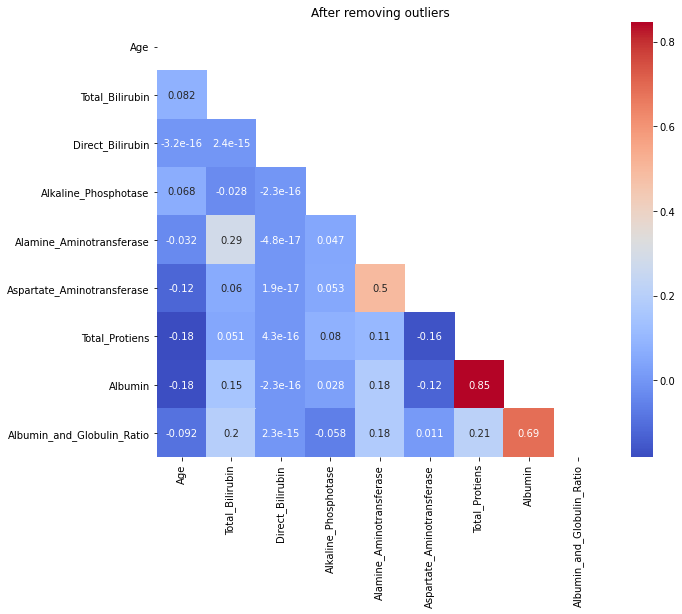

In [41]:
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm',
            mask=np.triu(df_clean.corr())).set_title("After removing outliers")

## Logistic Regression

In [42]:
df_trimmed.drop(columns="Albumin", inplace=True)

/home/aarush100616/.local/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Splitting data to X & y

In [47]:
X = df_trimmed.loc[:, df_trimmed.columns!='Target']
y = df_trimmed.loc[:, 'Target']

In [48]:
X_all = df.loc[:, df.columns!='Target']
y_all = df.loc[:, 'Target']

In [49]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = 0.30, random_state = 0, stratify = y_all)

## Model

In [50]:
model = LogisticRegression(max_iter=1000)

In [51]:
res_1 = model.fit(X, y)
y_predict_1 = model.predict(X)
confusion_matrix(y_pred=y_predict_1,y_true=y)

array([[30, 28],
       [18, 43]])

In [52]:
print("Accuracy:", accuracy_score(y, y_predict_1))
print("Precision:", precision_score(y, y_predict_1))
print("Recall:", recall_score(y, y_predict_1))
print("Balanced accuracy score:", balanced_accuracy_score(y, y_predict_1))

Accuracy: 0.6134453781512605
Precision: 0.6056338028169014
Recall: 0.7049180327868853
Balanced accuracy score: 0.6110797060486151


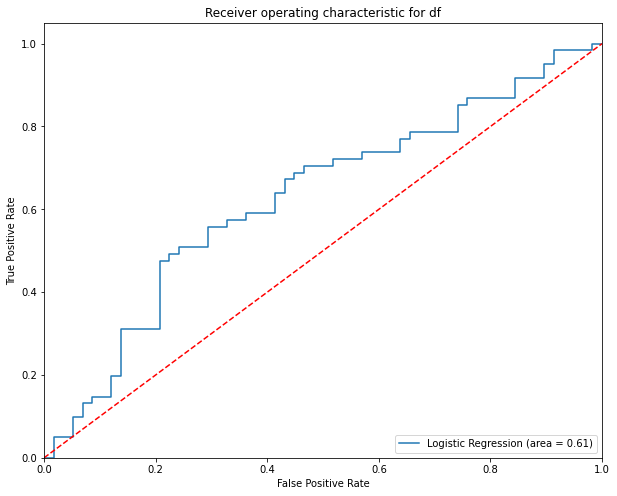

In [53]:
logit_roc_auc_1 = roc_auc_score(y, y_predict_1)
fpr_1, tpr_1, thresholds_1 = roc_curve(y, res_1.predict_proba(X)[:, 1])
plt.pyplot.plot(fpr_1, tpr_1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_1)
plt.pyplot.plot([0, 1], [0, 1], 'r--')
plt.pyplot.xlim([0.0, 1.0])
plt.pyplot.ylim([0.0, 1.05])
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('Receiver operating characteristic for df')
plt.pyplot.legend(loc="lower right")

In [54]:
res_2 = model.fit(X_train_all, y_train_all)
y_predict_2 = model.predict(X_test_all)
confusion_matrix(y_pred=y_predict_2, y_true=y_test_all)

/home/aarush100616/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 17,  33],
       [ 21, 103]])

In [55]:
print("Accuracy:", accuracy_score(y_test_all, y_predict_2))
print("Precision:", precision_score(y_test_all, y_predict_2))
print("Recall:", recall_score(y_test_all, y_predict_2))
print("Balanced accuracy score:", balanced_accuracy_score(y_test_all, y_predict_2))

Accuracy: 0.6896551724137931
Precision: 0.7573529411764706
Recall: 0.8306451612903226
Balanced accuracy score: 0.5853225806451613


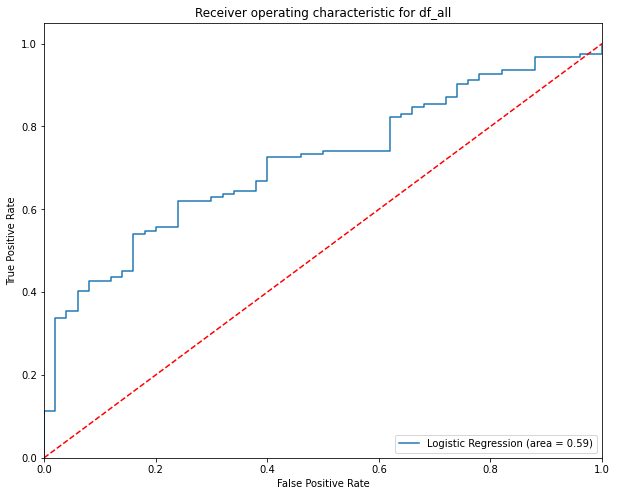

In [56]:
logit_roc_auc_2 = roc_auc_score(y_test_all, y_predict_2)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test_all, res_2.predict_proba(X_test_all)[:, 1])
plt.pyplot.plot(fpr_2, tpr_2, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_2)
plt.pyplot.plot([0, 1], [0, 1], 'r--')
plt.pyplot.xlim([0.0, 1.0])
plt.pyplot.ylim([0.0, 1.05])
plt.pyplot.xlabel('False Positive Rate')
plt.pyplot.ylabel('True Positive Rate')
plt.pyplot.title('Receiver operating characteristic for df_all')
plt.pyplot.legend(loc="lower right")

## Comparison of results

In [57]:
data = {"df_trimmed": [accuracy_score(y, y_predict_1), precision_score(y, y_predict_1), recall_score(y, y_predict_1), balanced_accuracy_score(y, y_predict_1)],
        "df": [accuracy_score(y_test_all, y_predict_2), precision_score(y_test_all, y_predict_2), recall_score(y_test_all, y_predict_2), balanced_accuracy_score(y_test_all, y_predict_2)]}

comparision = pd.DataFrame(data, index = ["Accuracy", "Precision", "Recall", "Balanced accuracy"])
print(comparision)

                   df_trimmed        df
Accuracy             0.613445  0.689655
Precision            0.605634  0.757353
Recall               0.704918  0.830645
Balanced accuracy    0.611080  0.585323


In [58]:
print("Liver patients percentage in df_trimmed:", df_trimmed.Target.sum()/len(df_trimmed.Target))
print("Liver patients percentage in df:", df.Target.sum()/len(df.Target))

Liver patients percentage in df_trimmed: 0.5126050420168067
Liver patients percentage in df: 0.7150259067357513


## Conclusion

* The first conclusion we can make is: DELETING almost 80% of our database because of outliers is a bad idea. We really shouldn't be doing this.
* The models for the two cases are slightly different say about 10% on average. Which means that laboriously checking assumptions, eliminating outliers, removing a highly correlated variable, etc. produced a poor end result.
* Of course, it should be noted that in our decimated database, about 51% of cases had a diseased liver, and our accuracy is 61% in this model. Using this model, we slightly improve our assessment of whether a patient has a diseased liver or not, compared to assuming that all patients have the disease. For the entire database, patients with diseased liver make up about 72% of the cases, and our model has a accuracy of 70%, so just looking at this rate, you could say that whether we use the model or assume that everyone has the disease...it doesn't matter.